In [1]:
%%time
import time
start_time = time.time()

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import csv

pd.set_option('display.max_columns', None)



CPU times: total: 7.7 s
Wall time: 16.3 s


In [2]:
# Load the dataset
#data = pd.read_csv("./Data_ADNIMerge_procssedNeuroImaging.csv")

In [3]:
#data.head()

In [4]:
# Check the shape of the complete datasets
#data.shape

In [5]:
#View the columns of the datasets
#data.columns

In [6]:
"""# MCAR: Missing Completely at Random
# For 'SepalLengthCm' and 'SepalWidthCm', we'll randomly assign 50% of the data as NaN
for col in ['lh.Cerebellum.Cortex',
       'lh.Thalamus.Proper', 'lh.Caudate', 'lh.Putamen', 'COMP_EXEC_FUNC_SCORE', 'PTEDUCAT','APOE4.0', 'APOE4.1','COMP_EXEC_FUNC_SCORE', 'NPIGTOT', 'NPIHTOT', 'NPIITOT']:
    data.loc[data.sample(frac=0.15).index, col] = np.nan"""

"# MCAR: Missing Completely at Random\n# For 'SepalLengthCm' and 'SepalWidthCm', we'll randomly assign 50% of the data as NaN\nfor col in ['lh.Cerebellum.Cortex',\n       'lh.Thalamus.Proper', 'lh.Caudate', 'lh.Putamen', 'COMP_EXEC_FUNC_SCORE', 'PTEDUCAT','APOE4.0', 'APOE4.1','COMP_EXEC_FUNC_SCORE', 'NPIGTOT', 'NPIHTOT', 'NPIITOT']:\n    data.loc[data.sample(frac=0.15).index, col] = np.nan"

In [7]:
#data.head()

In [8]:
#data.shape

In [9]:
#data.isna().sum()

In [10]:
#data.to_csv('adni_mcar80.csv')

In [11]:
# Load the dataset
data = pd.read_csv("./adni_mcar80.csv")

In [12]:
# Split the data into complete and incomplete datasets
complete_data = data.dropna()
incomplete_data = data[data.isnull().any(axis=1)].copy()

In [13]:
incomplete_data.head()

,Unnamed: 0,RID,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,lh.Amygdala,CSF,lh.Accumbens.area,lh.VentralDC,lh.choroid.plexus,rh.Cerebellum.White.Matter,rh.Cerebellum.Cortex,rh.Thalamus.Proper,rh.Caudate,rh.Putamen,rh.Pallidum,rh.Hippocampus,rh.Amygdala,rh.Accumbens.area,rh.VentralDC,rh.choroid.plexus,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,ctx.lh.unknown,ctx.lh.bankssts,ctx.lh.caudalanteriorcingulate,ctx.lh.caudalmiddlefrontal,ctx.lh.corpuscallosum,ctx.lh.cuneus,ctx.lh.entorhinal,ctx.lh.fusiform,ctx.lh.inferiorparietal,ctx.lh.inferiortemporal,ctx.lh.isthmuscingulate,ctx.lh.lateraloccipital,ctx.lh.lateralorbitofrontal,ctx.lh.lingual,ctx.lh.medialorbitofrontal,ctx.lh.middletemporal,ctx.lh.parahippocampal,ctx.lh.paracentral,ctx.lh.parsopercularis,ctx.lh.parsorbitalis,ctx.lh.parstriangularis,ctx.lh.pericalcarine,ctx.lh.postcentral,ctx.lh.posteriorcingulate,ctx.lh.precentral,ctx.lh.precuneus,ctx.lh.rostralanteriorcingulate,ctx.lh.rostralmiddlefrontal,ctx.lh.superiorfrontal,ctx.lh.superiorparietal,ctx.lh.superiortemporal,ctx.lh.supramarginal,ctx.lh.frontalpole,ctx.lh.temporalpole,ctx.lh.transversetemporal,ctx.lh.insula,ctx.rh.unknown,ctx.rh.bankssts,ctx.rh.caudalanteriorcingulate,ctx.rh.caudalmiddlefrontal,ctx.rh.corpuscallosum,ctx.rh.cuneus,ctx.rh.entorhinal,ctx.rh.fusiform,ctx.rh.inferiorparietal,ctx.rh.inferiortemporal,ctx.rh.isthmuscingulate,ctx.rh.lateraloccipital,ctx.rh.lateralorbitofrontal,ctx.rh.lingual,ctx.rh.medialorbitofrontal,ctx.rh.middletemporal,ctx.rh.parahippocampal,ctx.rh.paracentral,ctx.rh.parsopercularis,ctx.rh.parsorbitalis,ctx.rh.parstriangularis,ctx.rh.pericalcarine,ctx.rh.postcentral,ctx.rh.posteriorcingulate,ctx.rh.precentral,ctx.rh.precuneus,ctx.rh.rostralanteriorcingulate,ctx.rh.rostralmiddlefrontal,ctx.rh.superiorfrontal,ctx.rh.superiorparietal,ctx.rh.superiortemporal,ctx.rh.supramarginal,ctx.rh.frontalpole,ctx.rh.temporalpole,ctx.rh.transversetemporal,ctx.rh.insula,wm.lh.bankssts,wm.lh.caudalanteriorcingulate,wm.lh.caudalmiddlefrontal,wm.lh.corpuscallosum,wm.lh.cuneus,wm.lh.entorhinal,wm.lh.fusiform,wm.lh.inferiorparietal,wm.lh.inferiortemporal,wm.lh.isthmuscingulate,wm.lh.lateraloccipital,wm.lh.lateralorbitofrontal,wm.lh.lingual,wm.lh.medialorbitofrontal,wm.lh.middletemporal,wm.lh.parahippocampal,wm.lh.paracentral,wm.lh.parsopercularis,wm.lh.parsorbitalis,wm.lh.parstriangularis,wm.lh.pericalcarine,wm.lh.postcentral,wm.lh.posteriorcingulate,wm.lh.precentral,wm.lh.precuneus,wm.lh.rostralanteriorcingulate,wm.lh.rostralmiddlefrontal,wm.lh.superiorfrontal,wm.lh.superiorparietal,wm.lh.superiortemporal,wm.lh.supramarginal,wm.lh.frontalpole,wm.lh.temporalpole,wm.lh.transversetemporal,wm.lh.insula,wm.rh.bankssts,wm.rh.caudalanteriorcingulate,wm.rh.caudalmiddlefrontal,wm.rh.corpuscallosum,wm.rh.cuneus,wm.rh.entorhinal,wm.rh.fusiform,wm.rh.inferiorparietal,wm.rh.inferiortemporal,wm.rh.isthmuscingulate,wm.rh.lateraloccipital,wm.rh.lateralorbitofrontal,wm.rh.lingual,wm.rh.medialorbitofrontal,wm.rh.middletemporal,wm.rh.parahippocampal,wm.rh.paracentral,wm.rh.parsopercularis,wm.rh.parsorbitalis,wm.rh.parstriangularis,wm.rh.pericalcarine,wm.rh.postcentral,wm.rh.posteriorcingulate,wm.rh.precentral,wm.rh.precuneus,wm.rh.rostralanteriorcingulate,wm.rh.rostralmiddlefrontal,wm.rh.superiorfrontal,wm.rh.superiorparietal,wm.rh.superiortemporal,wm.rh.supramarginal,wm.rh.frontalpole,wm.rh.temporalpole,wm.rh.transversetemporal,wm.rh.insula,wm.lh.Unsegmented,wm.rh.Unsegmented,AGE,PTGENDER,PTEDUCAT,PHC_MEM,PHC_EXF,PHC_LAN,AD_LABEL,ADAS_TOTAL,CBB_SCORE_.,CDR,MMSE,MODHACH_SCORE,NPITOTAL,LOG_MEM_IMM_TOTAL,LOG_MEM_DEL_TOTAL,COMP_MEM_SCORE,COMP_EXEC_FUNC_SCORE,MOTHDEM,FATHDEM,GDTOTAL,NPIATOT,NPIBTOT,NPICTOT,NPIDTOT,NPIETOT,NPIFTOT,NPIGTOT,NPIHTOT,NPIITOT,NPIJTOT,NPIKTOT,NPILTOT,adas_Q4SCORE,adas_Q1SCORE,adas_Q2SCORE,adas_Q3SCORE,adas_Q5SCORE,adas_Q6SCORE,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_

### Check the % of the missingness by observing the original dataset and the artificially create dataset

In [14]:
data.shape

(559, 225)

In [15]:
incomplete_data.shape

(487, 225)

In [16]:
complete_data.shape

(72, 225)

In [17]:
# Normalize the complete dataset
scaler = MinMaxScaler()
scaled_complete_data = scaler.fit_transform(complete_data)


In [18]:
# Split the complete data into training and testing sets
X_train, X_test = train_test_split(scaled_complete_data, test_size=0.2, random_state=42)


In [19]:
# Define the Denoising Autoencoder
input_dim = X_train.shape[1]


In [20]:
encoding_dim = 32  # The size of the middle hidden layer

In [21]:
input_layer = Input(shape=(input_dim,))
encoder_hidden_1 = Dense(128, activation='relu')(input_layer)
encoder_hidden_2 = Dense(encoding_dim, activation='relu')(encoder_hidden_1)
encoder = Model(input_layer, encoder_hidden_2)

decoder_input = Input(shape=(encoding_dim,))
decoder_hidden_1 = Dense(128, activation='relu')(decoder_input)
decoder_output = Dense(input_dim, activation='sigmoid')(decoder_hidden_1)
decoder = Model(decoder_input, decoder_output)

In [22]:
# Create the full autoencoder
autoencoder_output = decoder(encoder(input_layer))
autoencoder = Model(input_layer, autoencoder_output)

In [23]:
# Compile the autoencoder
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [27]:
%%time
# Train the autoencoder
history = autoencoder.fit(
    X_train + 0.1 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape), # add noise
    X_train,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping]
)

Epoch 1/100
2/2 [==============================] - 0s 101ms/step - loss: 0.0153 - val_loss: 0.0229
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 0.0151 - val_loss: 0.0230
Epoch 3/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0149 - val_loss: 0.0228
Epoch 4/100
2/2 [==============================] - 0s 46ms/step - loss: 0.0147 - val_loss: 0.0231
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0145 - val_loss: 0.0230
Epoch 6/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0144 - val_loss: 0.0230
Epoch 7/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0142 - val_loss: 0.0228
Epoch 8/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0140 - val_loss: 0.0227
Epoch 9/100
2/2 [==============================] - 0s 46ms/step - loss: 0.0139 - val_loss: 0.0229
Epoch 10/100
2/2 [==============================] - 0s 51ms/step - loss: 0.0138 - val_loss: 0.0225
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0081 - val_loss: 0.0216
Epoch 85/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0080 - val_loss: 0.0215
Epoch 86/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0080 - val_loss: 0.0216
Epoch 87/100
2/2 [==============================] - 0s 42ms/step - loss: 0.0079 - val_loss: 0.0217
Epoch 88/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0079 - val_loss: 0.0215
Epoch 89/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0079 - val_loss: 0.0217
Epoch 90/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0078 - val_loss: 0.0215
Epoch 91/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0078 - val_loss: 0.0217
Epoch 92/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0077 - val_loss: 0.0216
Epoch 93/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0077 - val_loss: 0.0216
Epoch 94/1

In [28]:
%%time
# Replace the NaNs in the incomplete data with a temporary placeholder value before scaling
scaled_incomplete_data = scaler.transform(incomplete_data.fillna(-999))

CPU times: total: 15.6 ms
Wall time: 10 ms


In [29]:
%%time
# Use the trained autoencoder to predict the missing values
predicted_data = autoencoder.predict(scaled_incomplete_data)

16/16 [==============================] - 0s 3ms/step
CPU times: total: 297 ms
Wall time: 264 ms


In [30]:
%%time
# Replace the placeholder values with the predicted ones
nan_cols = incomplete_data.columns[incomplete_data.isna().any()].tolist()
for col in nan_cols:
    missing_index = incomplete_data[col].isna()
    incomplete_data.loc[missing_index, col] = scaler.inverse_transform(predicted_data)[missing_index, data.columns.get_loc(col)]

CPU times: total: 31.2 ms
Wall time: 23 ms


In [31]:
# Combine the complete and incomplete data back together
data = pd.concat([complete_data, incomplete_data])

In [32]:
data.head()

,Unnamed: 0,RID,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,lh.Amygdala,CSF,lh.Accumbens.area,lh.VentralDC,lh.choroid.plexus,rh.Cerebellum.White.Matter,rh.Cerebellum.Cortex,rh.Thalamus.Proper,rh.Caudate,rh.Putamen,rh.Pallidum,rh.Hippocampus,rh.Amygdala,rh.Accumbens.area,rh.VentralDC,rh.choroid.plexus,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,ctx.lh.unknown,ctx.lh.bankssts,ctx.lh.caudalanteriorcingulate,ctx.lh.caudalmiddlefrontal,ctx.lh.corpuscallosum,ctx.lh.cuneus,ctx.lh.entorhinal,ctx.lh.fusiform,ctx.lh.inferiorparietal,ctx.lh.inferiortemporal,ctx.lh.isthmuscingulate,ctx.lh.lateraloccipital,ctx.lh.lateralorbitofrontal,ctx.lh.lingual,ctx.lh.medialorbitofrontal,ctx.lh.middletemporal,ctx.lh.parahippocampal,ctx.lh.paracentral,ctx.lh.parsopercularis,ctx.lh.parsorbitalis,ctx.lh.parstriangularis,ctx.lh.pericalcarine,ctx.lh.postcentral,ctx.lh.posteriorcingulate,ctx.lh.precentral,ctx.lh.precuneus,ctx.lh.rostralanteriorcingulate,ctx.lh.rostralmiddlefrontal,ctx.lh.superiorfrontal,ctx.lh.superiorparietal,ctx.lh.superiortemporal,ctx.lh.supramarginal,ctx.lh.frontalpole,ctx.lh.temporalpole,ctx.lh.transversetemporal,ctx.lh.insula,ctx.rh.unknown,ctx.rh.bankssts,ctx.rh.caudalanteriorcingulate,ctx.rh.caudalmiddlefrontal,ctx.rh.corpuscallosum,ctx.rh.cuneus,ctx.rh.entorhinal,ctx.rh.fusiform,ctx.rh.inferiorparietal,ctx.rh.inferiortemporal,ctx.rh.isthmuscingulate,ctx.rh.lateraloccipital,ctx.rh.lateralorbitofrontal,ctx.rh.lingual,ctx.rh.medialorbitofrontal,ctx.rh.middletemporal,ctx.rh.parahippocampal,ctx.rh.paracentral,ctx.rh.parsopercularis,ctx.rh.parsorbitalis,ctx.rh.parstriangularis,ctx.rh.pericalcarine,ctx.rh.postcentral,ctx.rh.posteriorcingulate,ctx.rh.precentral,ctx.rh.precuneus,ctx.rh.rostralanteriorcingulate,ctx.rh.rostralmiddlefrontal,ctx.rh.superiorfrontal,ctx.rh.superiorparietal,ctx.rh.superiortemporal,ctx.rh.supramarginal,ctx.rh.frontalpole,ctx.rh.temporalpole,ctx.rh.transversetemporal,ctx.rh.insula,wm.lh.bankssts,wm.lh.caudalanteriorcingulate,wm.lh.caudalmiddlefrontal,wm.lh.corpuscallosum,wm.lh.cuneus,wm.lh.entorhinal,wm.lh.fusiform,wm.lh.inferiorparietal,wm.lh.inferiortemporal,wm.lh.isthmuscingulate,wm.lh.lateraloccipital,wm.lh.lateralorbitofrontal,wm.lh.lingual,wm.lh.medialorbitofrontal,wm.lh.middletemporal,wm.lh.parahippocampal,wm.lh.paracentral,wm.lh.parsopercularis,wm.lh.parsorbitalis,wm.lh.parstriangularis,wm.lh.pericalcarine,wm.lh.postcentral,wm.lh.posteriorcingulate,wm.lh.precentral,wm.lh.precuneus,wm.lh.rostralanteriorcingulate,wm.lh.rostralmiddlefrontal,wm.lh.superiorfrontal,wm.lh.superiorparietal,wm.lh.superiortemporal,wm.lh.supramarginal,wm.lh.frontalpole,wm.lh.temporalpole,wm.lh.transversetemporal,wm.lh.insula,wm.rh.bankssts,wm.rh.caudalanteriorcingulate,wm.rh.caudalmiddlefrontal,wm.rh.corpuscallosum,wm.rh.cuneus,wm.rh.entorhinal,wm.rh.fusiform,wm.rh.inferiorparietal,wm.rh.inferiortemporal,wm.rh.isthmuscingulate,wm.rh.lateraloccipital,wm.rh.lateralorbitofrontal,wm.rh.lingual,wm.rh.medialorbitofrontal,wm.rh.middletemporal,wm.rh.parahippocampal,wm.rh.paracentral,wm.rh.parsopercularis,wm.rh.parsorbitalis,wm.rh.parstriangularis,wm.rh.pericalcarine,wm.rh.postcentral,wm.rh.posteriorcingulate,wm.rh.precentral,wm.rh.precuneus,wm.rh.rostralanteriorcingulate,wm.rh.rostralmiddlefrontal,wm.rh.superiorfrontal,wm.rh.superiorparietal,wm.rh.superiortemporal,wm.rh.supramarginal,wm.rh.frontalpole,wm.rh.temporalpole,wm.rh.transversetemporal,wm.rh.insula,wm.lh.Unsegmented,wm.rh.Unsegmented,AGE,PTGENDER,PTEDUCAT,PHC_MEM,PHC_EXF,PHC_LAN,AD_LABEL,ADAS_TOTAL,CBB_SCORE_.,CDR,MMSE,MODHACH_SCORE,NPITOTAL,LOG_MEM_IMM_TOTAL,LOG_MEM_DEL_TOTAL,COMP_MEM_SCORE,COMP_EXEC_FUNC_SCORE,MOTHDEM,FATHDEM,GDTOTAL,NPIATOT,NPIBTOT,NPICTOT,NPIDTOT,NPIETOT,NPIFTOT,NPIGTOT,NPIHTOT,NPIITOT,NPIJTOT,NPIKTOT,NPILTOT,adas_Q4SCORE,adas_Q1SCORE,adas_Q2SCORE,adas_Q3SCORE,adas_Q5SCORE,adas_Q6SCORE,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_

In [33]:
data.to_csv('adni_mcar_imputed.csv')

In [34]:
# Print the training and validation MSE
print("Training MSE: ", history.history['loss'])
print("Validation MSE: ", history.history['val_loss'])


Training MSE:  [0.015268344432115555, 0.015071725472807884, 0.01489435788244009, 0.014700506813824177, 0.014539528638124466, 0.014361499808728695, 0.01418327447026968, 0.01402815617620945, 0.013878127560019493, 0.01377112790942192, 0.013587669469416142, 0.013410214334726334, 0.013309188187122345, 0.013140362687408924, 0.013027990236878395, 0.012935331091284752, 0.012801935896277428, 0.01270620059221983, 0.012565746903419495, 0.01248731929808855, 0.01235701609402895, 0.012261001393198967, 0.012207647785544395, 0.012111437506973743, 0.012010565027594566, 0.011930680833756924, 0.011817676946520805, 0.011717124842107296, 0.011619072407484055, 0.011517807841300964, 0.011418676003813744, 0.011322785168886185, 0.011252940632402897, 0.011173125356435776, 0.01110188290476799, 0.011033808812499046, 0.010927398689091206, 0.010865725576877594, 0.010773083195090294, 0.01070226076990366, 0.010630114004015923, 0.010575373657047749, 0.010507699102163315, 0.01043202169239521, 0.010366813279688358, 0.01

In [35]:
# Calculate the average training and validation MSE
avg_training_mse = np.mean(history.history['loss'])
avg_validation_mse = np.mean(history.history['val_loss'])

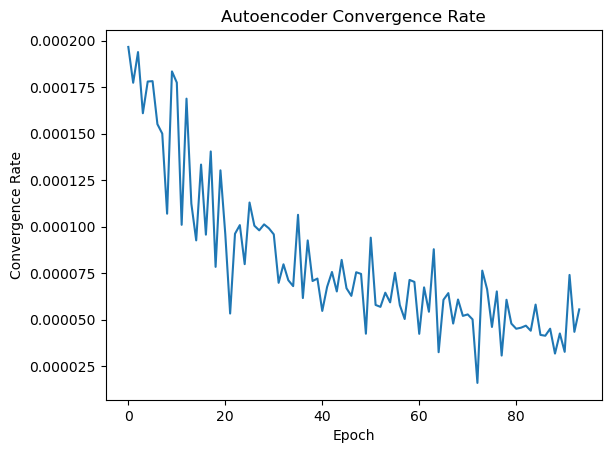

In [36]:
# Get the reconstruction losses
reconstruction_losses = history.history['loss']

# Calculate the convergence rate
convergence_rate = []
for i in range(1, len(reconstruction_losses)):
    convergence_rate.append(reconstruction_losses[i - 1] - reconstruction_losses[i])

# Plot the convergence rate
plt.plot(convergence_rate)
plt.xlabel("Epoch")
plt.ylabel("Convergence Rate")
plt.title("Autoencoder Convergence Rate")
plt.show()

In [37]:
end_time = time.time()
elapsed_time = end_time - start_time

### REPORT

In [38]:
# Print the averages
print("Average training MSE: ", avg_training_mse)
print("Average validation MSE: ", avg_validation_mse)
print(f"Elapsed time for the code to run: {elapsed_time} seconds")

Average training MSE:  0.010512170749471375
Average validation MSE:  0.022002327187280905
Elapsed time for the code to run: 95.60930848121643 seconds
